In [119]:
import geopandas as gpd
import pandas as pd

In [120]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/BATISTINI - EIXOS VIA_SEM CONFLITOS PROSAB.dxf', encoding='ANSI_1252')

In [121]:
bairro = 'BATISTINI'

In [122]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [123]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [124]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA ANTONIA MARIA SALATIEL - 30_12_20 - etapa ...,None,AcDbEntity:AcDb2dPolyline,None,88C,None,"LINESTRING Z (339122.635 7372263.834 0.000, 33..."
1,RUA ASSUMPTA SABATINI ROSSI - 30_12_20 - etapa...,None,AcDbEntity:AcDb2dPolyline,None,890,None,"LINESTRING Z (339037.145 7372695.600 0.000, 33..."
2,RUA GINÃS GONSALES - 30_12_20 - etapa 04 - D...,None,AcDbEntity:AcDb2dPolyline,None,912,None,"LINESTRING Z (338935.386 7370180.089 0.000, 33..."
3,RUA DAS AROEIRAS - 30_12_20 - etapa 04 - DJI_0...,None,AcDbEntity:AcDb2dPolyline,None,922,None,"LINESTRING Z (338777.515 7370175.048 0.000, 33..."
4,MCT - TV. DAS GOIABEIRAS,None,AcDbEntity:AcDb2dPolyline,None,92F,None,"LINESTRING Z (338804.573 7370246.690 0.000, 33..."
...,...,...,...,...,...,...,...
94,MARIA ENCARNAÃÃO NUTE - 30_12_20 - etapa 04 ...,None,AcDbEntity:AcDb2dPolyline,None,2B2D,None,"LINESTRING Z (338997.586 7370212.243 0.000, 33..."
95,RUA FRANCISCO AFONSO RIGUEIRA - 30_12_20 - eta...,None,AcDbEntity:AcDb2dPolyline,None,2B36,None,"LINESTRING Z (338731.441 7370094.119 0.000, 33..."
96,ESTRADA MARCO POLO - 30_12_20 - etapa 01 - DJI...,None,AcDbEntity:AcDb2dPolyline,None,2B43,None,"LINESTRING Z (340005.914 7372528.368 0.000, 33..."
97,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,None,AcDbEntity:AcDb2dPolyline,None,2B53,None,"LINESTRING Z (339486.973 7372027.563 0.000, 33..."


In [125]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [126]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

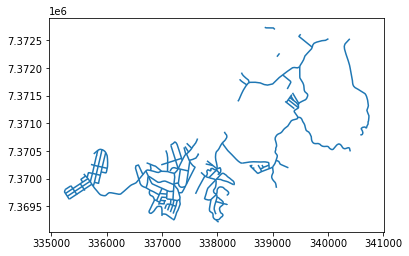

In [127]:
gdf_dxf.plot()

In [128]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('MCT - ', '')

In [129]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [130]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [131]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [132]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [133]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [134]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [135]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer']

4                                    TV. DAS GOIABEIRAS
6                                      RUA JOÃO ANTUNES
47                                           RUA TIBAGI
49                                                  ÚNA
55                                           RUA CANADÁ
61                                        RUA BOA VISTA
77                     AVENIDA VENÂNCIA TOMÁS DE AQUINO
80    ESTRADA GALVÃO BUENO - etapa 02 - DJI_0001 - D...
83                                      RUA NOVA YORQUE
92                                          RUA PARAÍBA
Name: Layer, dtype: object

In [136]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,RUA ANTONIA MARIA SALATIEL -,30_12_20,None,- etapa 01 -,None,DJI_0009,,None,None,None,None,None,None
1,RUA ASSUMPTA SABATINI ROSSI -,30_12_20,None,- etapa 01 -,None,DJI_0024,,None,None,None,None,None,None
2,RUA GINÉS GONSALES -,30_12_20,None,- etapa 04 -,None,DJI_0027,,None,None,None,None,None,None
3,RUA DAS AROEIRAS -,30_12_20,None,- etapa 04 -,None,DJI_0031,-,None,DJI_0032,-,None,DJI_0033,
4,TV. DAS GOIABEIRAS,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,MARIA ENCARNAÇÃO NUTE -,30_12_20,None,- etapa 04 -,None,DJI_0032,,None,None,None,None,None,None
95,RUA FRANCISCO AFONSO RIGUEIRA -,30_12_20,None,- etapa 04 -,None,DJI_0029,,None,None,None,None,None,None
96,ESTRADA MARCO POLO -,30_12_20,None,- etapa 01 -,None,DJI_0031,-,None,DJI_0032,-,None,DJI_0033,
97,ESTRADA GALVÃO -,30_12_20,None,- etapa 01 -,None,DJI_0028,,None,None,None,None,None,None


In [137]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].unique()

array([' - etapa 01 - ', '  - etapa 04 - ', ' - etapa 04 - ', None,
       ' - etapa 03 - ', ' - ', ' - etapa 02 - ', ' - MAVIC - ',
       ' - etapa 03 -  ', ' - etapa 01  - '], dtype=object)

In [138]:
etapas = {
    ' - etapa 03 - ':'etapa_03', 
    ' - etapa 01  - ':'etapa_01', 
    ' - etapa 01 - ':'etapa_01',
    ' - etapa 04 - ':'etapa_04', 
    ' - MAVIC - ':'mavic', 
    ' - etapa 02 - ':'etapa_02',
    ' - etapa 03 -  ':'etapa_03', 
    '  - etapa 02 - ':'etapa_02', 
    '  - etapa 04 - ':'etapa_04'
}

In [139]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

0     etapa_01
1     etapa_01
2     etapa_04
3     etapa_04
4          NaN
        ...   
94    etapa_04
95    etapa_04
96    etapa_01
97    etapa_01
98    etapa_03
Name: 3, Length: 99, dtype: object

In [140]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

In [141]:
gdf_dxf.loc[:, 'etapa']

0     etapa_01
1     etapa_01
2     etapa_04
3     etapa_04
4          NaN
        ...   
94    etapa_04
95    etapa_04
96    etapa_01
97    etapa_01
98    etapa_03
Name: etapa, Length: 99, dtype: object

In [142]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA ANTONIA MARIA SALATIEL - 30_12_20 - etapa ...,None,AcDbEntity:AcDb2dPolyline,None,88C,None,"LINESTRING Z (339122.635 7372263.834 0.000, 33...","[RUA ANTONIA MARIA SALATIEL, 30_12_20, etapa 0...",[DJI_0009],30_12_20,RUA ANTONIA MARIA SALATIEL,etapa_01
1,RUA ASSUMPTA SABATINI ROSSI - 30_12_20 - etapa...,None,AcDbEntity:AcDb2dPolyline,None,890,None,"LINESTRING Z (339037.145 7372695.600 0.000, 33...","[RUA ASSUMPTA SABATINI ROSSI, 30_12_20, etapa ...",[DJI_0024],30_12_20,RUA ASSUMPTA SABATINI ROSSI,etapa_01
2,RUA GINÉS GONSALES - 30_12_20 - etapa 04 - DJ...,None,AcDbEntity:AcDb2dPolyline,None,912,None,"LINESTRING Z (338935.386 7370180.089 0.000, 33...","[RUA GINÉS GONSALES, 30_12_20 , etapa 04, DJI_...",[DJI_0027],30_12_20,RUA GINÉS GONSALES,etapa_04
3,RUA DAS AROEIRAS - 30_12_20 - etapa 04 - DJI_0...,None,AcDbEntity:AcDb2dPolyline,None,922,None,"LINESTRING Z (338777.515 7370175.048 0.000, 33...","[RUA DAS AROEIRAS, 30_12_20, etapa 04, DJI_003...","[DJI_0031, DJI_0032, DJI_0033]",30_12_20,RUA DAS AROEIRAS,etapa_04
4,TV. DAS GOIABEIRAS,None,AcDbEntity:AcDb2dPolyline,None,92F,None,"LINESTRING Z (338804.573 7370246.690 0.000, 33...",[TV. DAS GOIABEIRAS],[],NaN,TV. DAS GOIABEIRAS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
94,MARIA ENCARNAÇÃO NUTE - 30_12_20 - etapa 04 - ...,None,AcDbEntity:AcDb2dPolyline,None,2B2D,None,"LINESTRING Z (338997.586 7370212.243 0.000, 33...","[MARIA ENCARNAÇÃO NUTE, 30_12_20, etapa 04, DJ...",[DJI_0032],30_12_20,MARIA ENCARNAÇÃO NUTE,etapa_04
95,RUA FRANCISCO AFONSO RIGUEIRA - 30_12_20 - eta...,None,AcDbEntity:AcDb2dPolyline,None,2B36,None,"LINESTRING Z (338731.441 7370094.119 0.000, 33...","[RUA FRANCISCO AFONSO RIGUEIRA, 30_12_20, etap...",[DJI_0029],30_12_20,RUA FRANCISCO AFONSO RIGUEIRA,etapa_04
96,ESTRADA MARCO POLO - 30_12_20 - etapa 01 - DJI...,None,AcDbEntity:AcDb2dPolyline,None,2B43,None,"LINESTRING Z (340005.914 7372528.368 0.000, 33...","[ESTRADA MARCO POLO, 30_12_20, etapa 01, DJI_0...","[DJI_0031, DJI_0032, DJI_0033]",30_12_20,ESTRADA MARCO POLO,etapa_01
97,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,None,AcDbEntity:AcDb2dPolyline,None,2B53,None,"LINESTRING Z (339486.973 7372027.563 0.000, 33...","[ESTRADA GALVÃO, 30_12_20, etapa 01 , DJI_0028]",[DJI_0028],30_12_20,ESTRADA GALVÃO,etapa_01


In [143]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [144]:
pd_videos

,Video_0,Video_1,Video_2
0,DJI_0009.MOV,None,None
1,DJI_0024.MOV,None,None
2,DJI_0027.MOV,None,None
3,DJI_0031.MOV,DJI_0032.MOV,DJI_0033.MOV
4,None,None,None
...,...,...,...
94,DJI_0032.MOV,None,None
95,DJI_0029.MOV,None,None
96,DJI_0031.MOV,DJI_0032.MOV,DJI_0033.MOV
97,DJI_0028.MOV,None,None


In [145]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [146]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1', 'Video_2'],
      dtype='object')

In [147]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [148]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [149]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [150]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [151]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.etapa + gdf_dxf[c]

In [152]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [153]:
gdf_dxf.crs = 'epsg:31983'

In [154]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_0_path,Video_1_path,Video_2_path
0,AVENIDA VENÂNCIA TOMÁS DE AQUINO,"LINESTRING Z (338448.560 7370280.386 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,E80,None,[AVENIDA VENÂNCIA TOMÁS DE AQUINO],[],None,AVENIDA VENÂNCIA TOMÁS DE AQUINO,,None,None,None,None,None,None
1,AVENIDA VITOR BRECHERET - 30_12_20 - etapa 02 ...,"LINESTRING Z (337290.654 7370180.316 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,28D6,None,"[AVENIDA VITOR BRECHERET, 30_12_20, etapa 02, ...",[DJI_0023],30_12_20/,AVENIDA VITOR BRECHERET,etapa_02/,DJI_0023.MOV,None,None,videos/batistini/etapa_02/DJI_0023.MOV,None,None
2,AVENIDA ÂNGEKO DEMACHI - 30_12_20 - etapa 01 -...,"LINESTRING Z (340581.836 7370794.687 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,None,A28,None,"[AVENIDA ÂNGEKO DEMACHI, 30_12_20, etapa 01, D...",[DJI_0004],30_12_20/,AVENIDA ÂNGEKO DEMACHI,etapa_01/,DJI_0004.MOV,None,None,videos/batistini/etapa_01/DJI_0004.MOV,None,None
3,ESTRADA GALVÃO - 30_12_20 - etapa 01 - DJI_0028,MULTILINESTRING Z ((337143.569 7370137.960 0.0...,None,AcDbEntity:AcDb2dPolyline,None,28C9,None,"[ESTRADA GALVÃO, 30_12_20, etapa 01 , DJI_0028]",[DJI_0028],30_12_20/,ESTRADA GALVÃO,etapa_01/,DJI_0028.MOV,None,None,videos/batistini/etapa_01/DJI_0028.MOV,None,None
4,ESTRADA GALVÃO BUENO - etapa 02 - DJI_0001 - D...,"LINESTRING (335585.095 7370085.560, 335616.587...",None,AcDbEntity:AcDbPolyline,None,27F7,None,"[ESTRADA GALVÃO BUENO, etapa 02, DJI_0001, DJI...","[DJI_0001, DJI_0002]",None,ESTRADA GALVÃO BUENO,,DJI_0001.MOV,DJI_0002.MOV,None,videos/batistini/DJI_0001.MOV,videos/batistini/DJI_0002.MOV,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,RUA ZURIQUE - 30_12_20 - etapa 03 - DJI_0131,"LINESTRING Z (337215.804 7369614.947 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,CAD,None,"[RUA ZURIQUE, 30_12_20, etapa 03, DJI_0131]",[DJI_0131],30_12_20/,RUA ZURIQUE,etapa_03/,DJI_0131.MOV,None,None,videos/batistini/etapa_03/DJI_0131.MOV,None,None
87,RUA ÚNA - 30_12_20 - etapa 03 - DJI_0113,"LINESTRING Z (337089.364 7369632.079 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,284F,None,"[RUA ÚNA, 30_12_20, etapa 03, DJI_0113]",[DJI_0113],30_12_20/,RUA ÚNA,etapa_03/,DJI_0113.MOV,None,None,videos/batistini/etapa_03/DJI_0113.MOV,None,None
88,TV SOSSEGO - 30_12_20 - etapa 01 - DJI_0030,"LINESTRING Z (338531.533 7371694.975 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,C00,None,"[TV SOSSEGO, 30_12_20, etapa 01, DJI_0030]",[DJI_0030],30_12_20/,TV SOSSEGO,etapa_01/,DJI_0030.MOV,None,None,videos/batistini/etapa_01/DJI_0030.MOV,None,None
89,TV. DAS GOIABEIRAS,"LINESTRING Z (338804.573 7370246.690 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,92F,None,[TV. DAS GOIABEIRAS],[],None,TV. DAS GOIABEIRAS,,None,None,None,None,None,None


In [155]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_0_path,Video_1_path,Video_2_path
0,"LINESTRING Z (338448.560 7370280.386 0.000, 33...",None,AVENIDA VENÂNCIA TOMÁS DE AQUINO,,None,None,None,None,None,None
1,"LINESTRING Z (337290.654 7370180.316 0.000, 33...",30_12_20/,AVENIDA VITOR BRECHERET,etapa_02/,DJI_0023.MOV,None,None,videos/batistini/etapa_02/DJI_0023.MOV,None,None
2,"LINESTRING Z (340581.836 7370794.687 0.000, 34...",30_12_20/,AVENIDA ÂNGEKO DEMACHI,etapa_01/,DJI_0004.MOV,None,None,videos/batistini/etapa_01/DJI_0004.MOV,None,None
3,MULTILINESTRING Z ((337143.569 7370137.960 0.0...,30_12_20/,ESTRADA GALVÃO,etapa_01/,DJI_0028.MOV,None,None,videos/batistini/etapa_01/DJI_0028.MOV,None,None
4,"LINESTRING (335585.095 7370085.560, 335616.587...",None,ESTRADA GALVÃO BUENO,,DJI_0001.MOV,DJI_0002.MOV,None,videos/batistini/DJI_0001.MOV,videos/batistini/DJI_0002.MOV,None
...,...,...,...,...,...,...,...,...,...,...
86,"LINESTRING Z (337215.804 7369614.947 0.000, 33...",30_12_20/,RUA ZURIQUE,etapa_03/,DJI_0131.MOV,None,None,videos/batistini/etapa_03/DJI_0131.MOV,None,None
87,"LINESTRING Z (337089.364 7369632.079 0.000, 33...",30_12_20/,RUA ÚNA,etapa_03/,DJI_0113.MOV,None,None,videos/batistini/etapa_03/DJI_0113.MOV,None,None
88,"LINESTRING Z (338531.533 7371694.975 0.000, 33...",30_12_20/,TV SOSSEGO,etapa_01/,DJI_0030.MOV,None,None,videos/batistini/etapa_01/DJI_0030.MOV,None,None
89,"LINESTRING Z (338804.573 7370246.690 0.000, 33...",None,TV. DAS GOIABEIRAS,,None,None,None,None,None,None


In [156]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'data_voo', 'Video_1', 'Video_0', 'Video_2', 'etapa'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [157]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_2           object
Video_0_path      object
Video_1_path      object
Video_2_path      object
dtype: object